
# 🌾🔍 Paddy Disease Classification with CNN in TensorFlow: Detecting Plant Health Using Deep Learning 🔍🌾
![](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEj2L9N0lhGjGtgkVlpwgZgesOFyXKkmtgIFgSKReftvom6FG-4MucKFJydYfsmJnSb8Zg42vMzr8yDII55T5wZNmKa0zxJSz25mLW1bc3algrXdqhyMCZ7yU-AwEZbmDG2MY9yUbtSIjjI/w640-h360-rw/Brown+spot+of+rice.jpg=w704-h396-p-k-no-nu)

## Import libraries

In [1]:
# import libaraies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

## Loading data and performing EDA

In [2]:
# load data

data = pd.read_csv('train.csv')

# check the data
data.head()

image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45
3  100632.jpg  bacterial_leaf_blight   ADT45   45
4  101918.jpg  bacterial_leaf_blight   ADT45   45

In [3]:
# check the shape of the data

data.shape

(10407, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB


In [5]:
# unique values in the label column

data['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [6]:
# unique values in the variety column

data['variety'].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

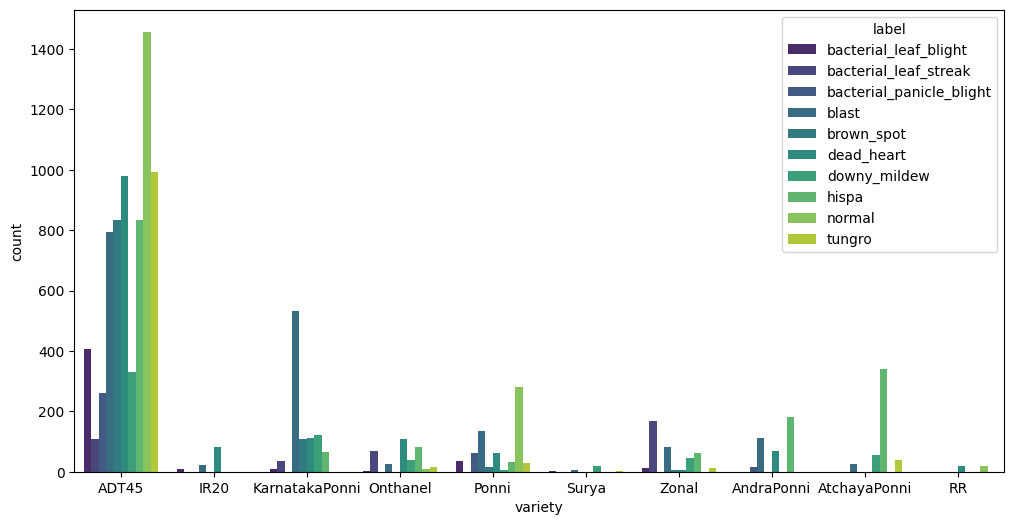

In [17]:
# check the count plot of each variety vertically

plt.figure(figsize=(12, 6))
sns.countplot(data,x='variety',hue='label',palette='viridis',)
plt.xticks(rotation=0)
plt.show()

In [18]:
# checking the age column

data['age'].describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

In [19]:
# filtering images from train images dataset

normal = data[data['label'] == 'normal']
normal = normal[normal['variety'] == 'ADT45']

five_normals = normal.image_id.values[:5]
five_normals.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [20]:
dead = data[data['label'] == 'dead_heart']
dead = dead[dead['variety'] == 'ADT45']
five_deads = dead.image_id.values[:5]
five_deads.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

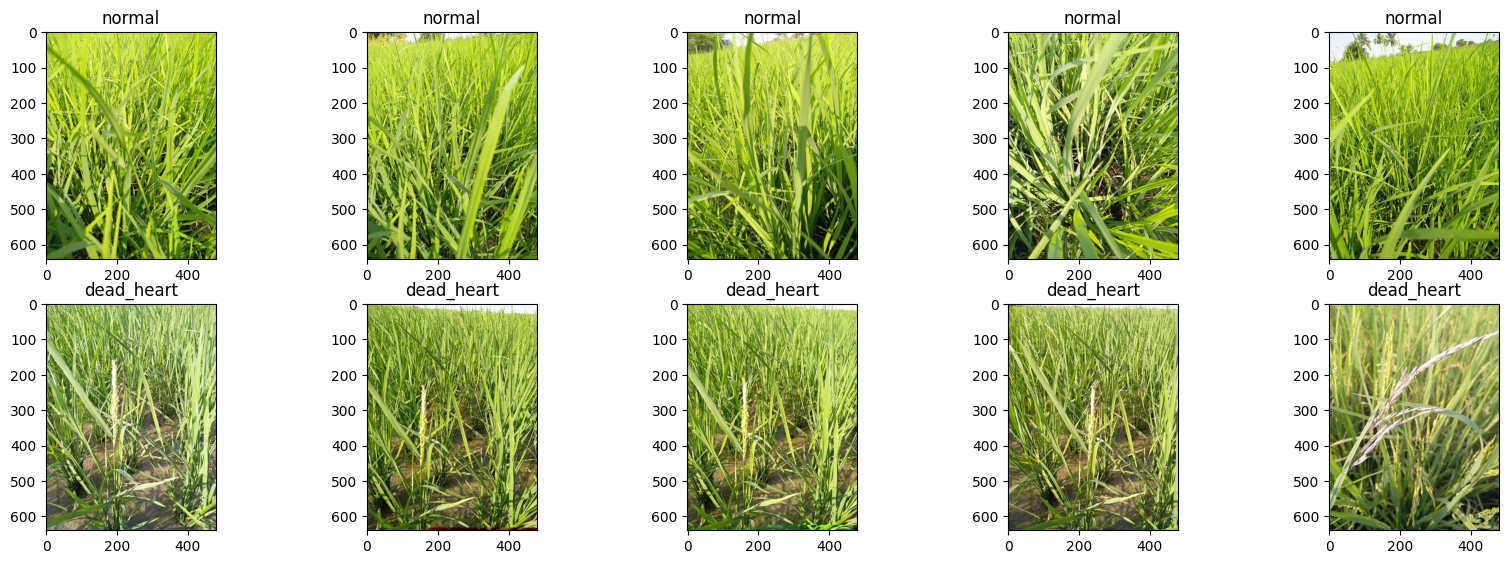

In [21]:
# plotting images from the train images dataset

plt.figure(figsize=(20, 10))
columns = 5
path = './train_images/'
for i, image_loc in enumerate(np.concatenate((five_normals, five_deads))):
    plt.subplot(10 // columns + 1, columns, i + 1)

    if i < 5:
        image = plt.imread(path +'normal/'+ image_loc)
        plt.title('normal')

    else:
        plt.title('dead_heart')
        image = plt.imread(path +'dead_heart/'+ image_loc)
        

    plt.imshow(image)

## Encoding the columns

In [22]:
# encode the label and variety columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['label'] = le.fit_transform(data['label'])
data['variety'] = le.fit_transform(data['variety'])

data.head()

image_id  label  variety  age
0  100330.jpg      0        0   45
1  100365.jpg      0        0   45
2  100382.jpg      0        0   45
3  100632.jpg      0        0   45
4  101918.jpg      0        0   45

## Defining Parameters

In [23]:
# define the parameters

batch_size = 32

image_size = 224
image_width = 224

## Splitting the data into training and testing dataset

In [24]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=190,
    image_size=(image_size, image_width),
    batch_size=batch_size,)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [25]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.3,
    subset="validation",
    seed=190,
    image_size=(image_size, image_width),
    batch_size=batch_size,)

Found 10407 files belonging to 10 classes.
Using 3122 files for validation.


In [26]:
class_names = train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


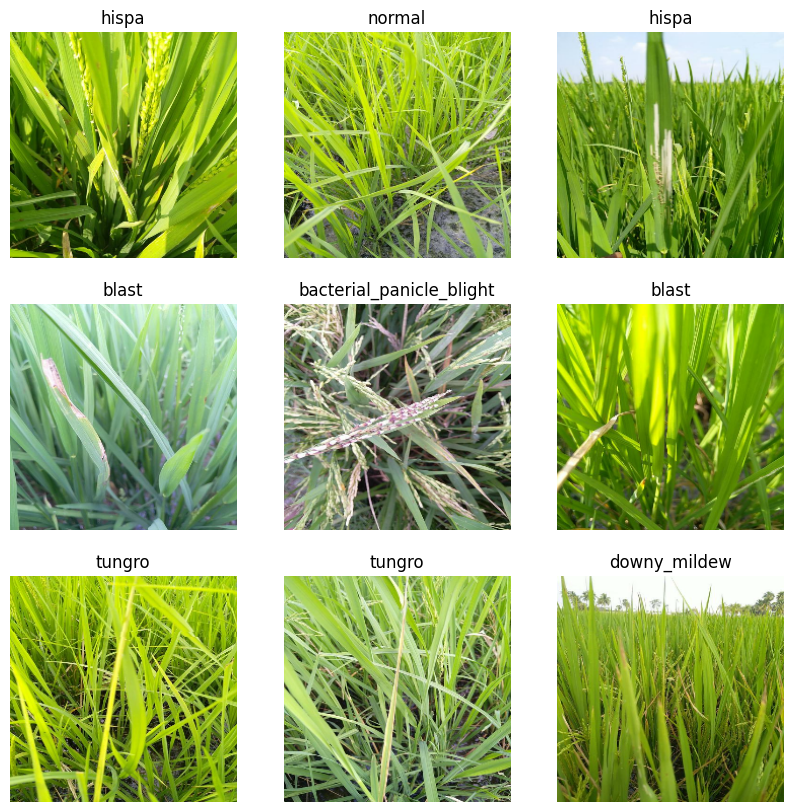

In [27]:
# visualize the data

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Normalizing the data

In [28]:
#normalize the data

normalization_layer = tf.keras.layers.Rescaling(1./255)

## Creating the model

In [30]:
# create the model

num_classes = 10

model = tf.keras.Sequential([
    
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',loss= tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

callback  = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_ds, validation_data= val_ds, epochs=1,callbacks=[callback])

# calculate the accuracy    

model.evaluate(val_ds)

261/261 ━━━━━━━━━━━━━━━━━━━━ 1080s 4s/step - accuracy: 0.2334 - loss: 2.0891 - val_accuracy: 0.4436 - val_loss: 1.6185
98/98 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.4659 - loss: 1.5451


[1.6162077188491821, 0.44362586736679077]

## Plotting Accuracy and loss after training model

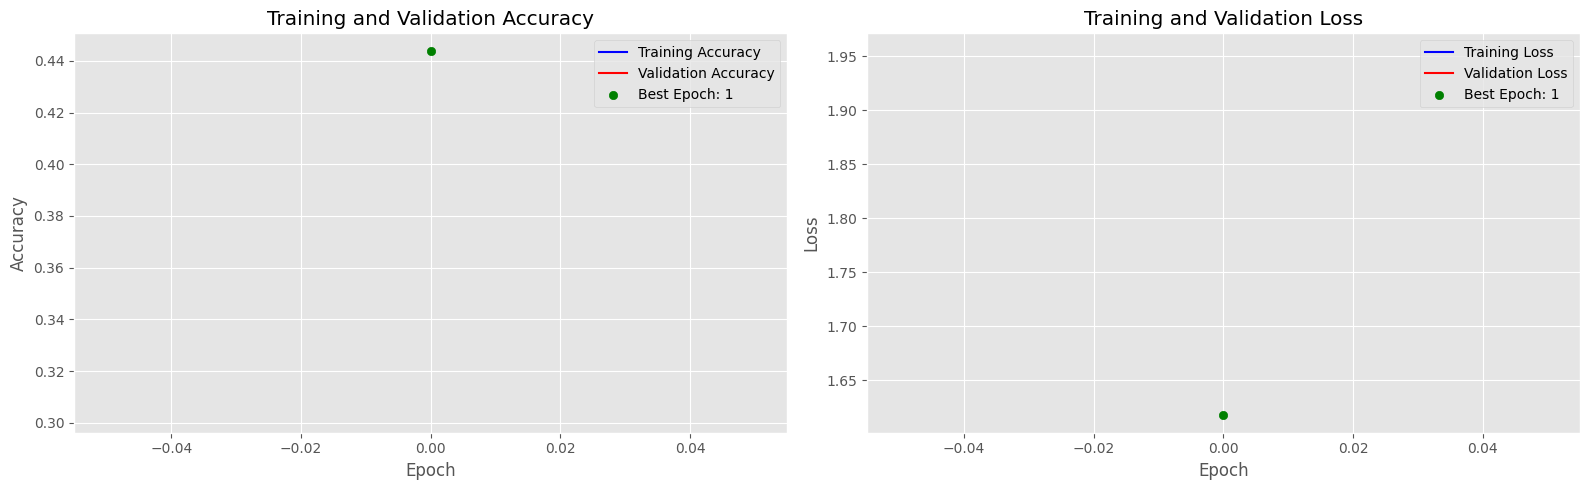

In [32]:
import matplotlib.pyplot as plt

# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('ggplot')  # Choose a valid style from plt.style.available

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()
# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()
plt.tight_layout()
plt.show()

# Final Prediction

In [33]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    './test_images',
    image_size=(image_size, image_width),
    batch_size=batch_size,
    label_mode=None,
    shuffle=False)


Found 3469 files.


In [34]:
y_pred =  model.predict(test_ds)

print(y_pred)


109/109 ━━━━━━━━━━━━━━━━━━━━ 78s 715ms/step
[[0.04976635 0.05094684 0.01569335 ... 0.084317   0.2886976  0.14102785]
 [0.03170704 0.00813256 0.00247479 ... 0.08062087 0.64528567 0.06700331]
 [0.0102087  0.01529065 0.00226244 ... 0.11279483 0.6878548  0.00728886]
 ...
 [0.06093021 0.01523564 0.00880019 ... 0.13527495 0.40409726 0.12863162]
 [0.02304281 0.04134731 0.02186109 ... 0.02561806 0.10799755 0.01743679]
 [0.00577852 0.00349801 0.00638259 ... 0.04133877 0.00112354 0.00086063]]


In [35]:
y_pred_classes = y_pred.argmax(axis=1)
y_pred_classes

array([8, 8, 8, ..., 8, 3, 5], dtype=int64)

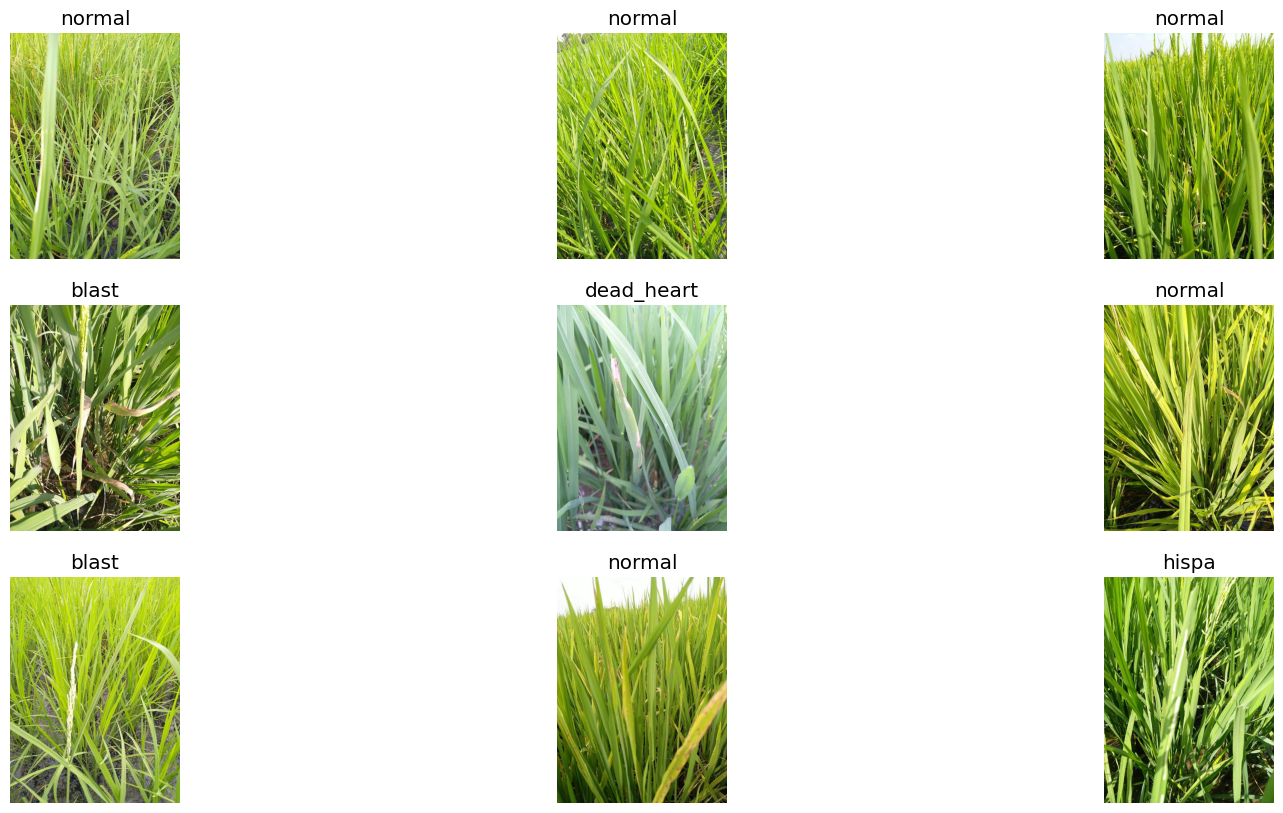

In [45]:
# plotting the predicting images

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(test_ds.file_paths[i]))
    plt.title(class_names[y_pred_classes[i]])
    plt.axis("off")

plt.show()



In [38]:
submission_classes = [class_names[x] for x in y_pred_classes]
submit = pd.read_csv('/kaggle/input/paddy-disease-classification/sample_submission.csv')
submit['label'] = submission_classes[:len(submit)]
submit.to_csv('submission.csv', index=False)